In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_stock = pd.read_csv('/content/drive/MyDrive/file_practice/all_stocks_5yr.csv')

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df_stock['date'] = pd.to_datetime(df_stock['date'])

# **1. Descriptive statistics**

In [7]:
stock_overview = df_stock.groupby('Name')['close'].describe().reset_index()

In [8]:
stock_overview

,Name,count,mean,std,min,25%,50%,75%,max
0,A,1259.0,49.202025,9.229804,33.3700,41.56000,46.70,56.4950,74.82
1,AAL,1259.0,38.393252,10.957636,13.0200,34.33000,40.87,46.5350,58.47
2,AAP,1259.0,132.433463,31.274463,76.1800,104.44000,141.30,156.7300,200.38
3,AAPL,1259.0,109.066698,30.556812,55.7899,84.83065,109.01,127.1200,179.26
4,ABBV,1259.0,60.864440,13.730380,35.2700,52.65000,60.17,65.7450,123.21
...,...,...,...,...,...,...,...,...,...
500,XYL,1259.0,41.434095,11.319674,24.1900,34.59000,37.28,49.1550,75.66
501,YUM,1259.0,75.451009,7.485003,59.7000,70.22500,74.10,80.4700,94.88
502,ZBH,1259.0,105.606291,15.052699,72.3800,96.07500,105.97,117.3150,133.09
503,ZION,1259.0,32.171790,7.673401,19.9000,27.50500,29.23,32.4625,54.98


**Top 10 Riskiest Stocks vs. Top 10 Safest Stocks**

In [9]:
# Riskiest Stocks
top_10_riskiest = stock_overview.sort_values(by = 'std', ascending = False).reset_index().head(10)

In [10]:
top_10_riskiest

,index,Name,count,mean,std,min,25%,50%,75%,max
0,360,PCLN,1259.0,1312.873538,320.533473,671.54,1142.5650,1253.04,1479.990,2049.00
1,38,AMZN,1259.0,576.880041,282.500395,248.23,325.8000,503.82,777.420,1450.89
2,207,GOOGL,1259.0,682.233847,187.573892,383.34,543.0225,652.47,806.400,1187.56
3,206,GOOG,975.0,725.403353,166.420529,492.55,564.7850,720.64,823.330,1175.84
4,325,MTD,1259.0,356.297498,131.397220,197.91,247.6300,321.61,415.765,692.30
5,58,AZO,1259.0,619.703654,130.749597,373.61,519.9750,619.11,740.720,815.98
6,105,CMG,1259.0,493.256008,130.280624,268.70,396.9750,464.81,610.550,757.77
7,163,EQIX,1259.0,290.430888,95.212805,155.18,210.1600,269.95,370.900,492.98
8,393,REGN,1259.0,381.833100,94.069345,158.42,308.4850,382.60,441.510,592.40
9,97,CHTR,1259.0,208.088389,83.636999,77.03,138.4900,181.75,270.395,402.50


In [11]:
# Safest Stocks
top_10_safest = stock_overview.sort_values(by = 'std', ascending = True).reset_index().head(10)
top_10_safest

,index,Name,count,mean,std,min,25%,50%,75%,max
0,16,AES,1259.0,12.340048,1.487180,8.54,11.230,12.23,13.5650,15.57
1,357,PBCT,1259.0,15.797398,1.648513,12.55,14.650,15.31,16.6475,20.08
2,348,NWS,1169.0,14.797733,1.791033,10.89,13.330,14.55,16.5200,18.13
3,489,WU,1259.0,18.520481,1.821214,13.82,17.100,18.88,19.7500,22.57
4,178,F,1259.0,14.102637,1.957269,10.24,12.405,13.97,15.7450,17.84
5,217,HBAN,1259.0,10.621372,2.020136,6.80,9.300,10.10,11.7800,16.34
6,349,NWSA,1169.0,14.714503,2.020552,10.40,13.010,14.67,16.5400,18.40
7,237,HST,1259.0,18.764481,2.298428,12.82,17.250,18.39,20.2400,24.33
8,273,KO,1259.0,42.116426,2.387542,36.84,40.490,41.92,43.7750,48.53
9,79,CA,1259.0,30.663518,2.430372,24.21,28.940,31.05,32.5400,35.90


**Volatility Analysis**

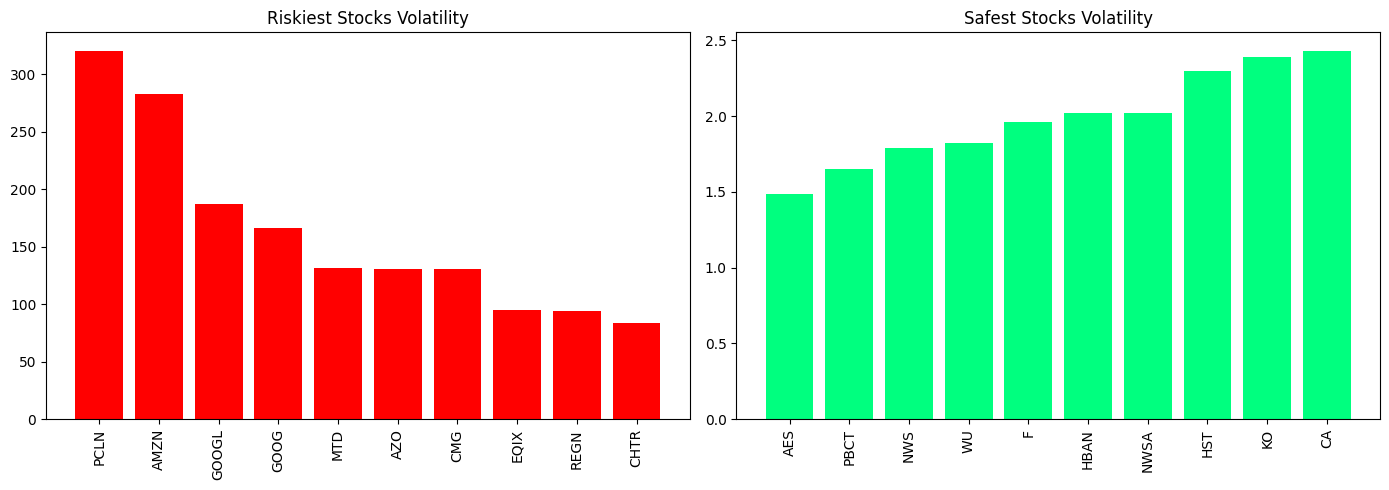

In [12]:
plt.figure(figsize = (14, 5))

# Riskiest Stocks Chart
ax1 = plt.subplot(1,2,1)
plt.bar(top_10_riskiest['Name'], top_10_riskiest['std'], color = 'red')
plt.xticks(rotation = 90)
plt.title('Riskiest Stocks Volatility')
# Safest Stocks Chart
ax1 = plt.subplot(1,2,2)
plt.bar(top_10_safest['Name'], top_10_safest['std'], color = 'springgreen')
plt.xticks(rotation = 90)
plt.title('Safest Stocks Volatility')
# Show
plt.tight_layout()
plt.show()

# **2. Time Series Analysis**

In [13]:
# Riskiest Stocks trends
risk_stock_name = ['PCLN', 'AMZN', 'GOOGL', 'GOOG', 'MTD', 'AZO', 'CMG', 'EQIX', 'REGN', 'CHTR']
df_risk_stock =  (
    df_stock[df_stock['Name'].isin(risk_stock_name)]
    .pivot_table(index = 'date', columns = 'Name', values = 'close')
    .reset_index()
)

# Safest Stocks trends
safe_stock_name = ['AES', 'PBCT', 'NWS', 'WU', 'F', 'HBAN', 'NWSA', 'HST', 'KO', 'CA']
df_safe_stock =  (
    df_stock[df_stock['Name'].isin(safe_stock_name)]
    .pivot_table(index = 'date', columns = 'Name', values = 'close')
    .reset_index()
)

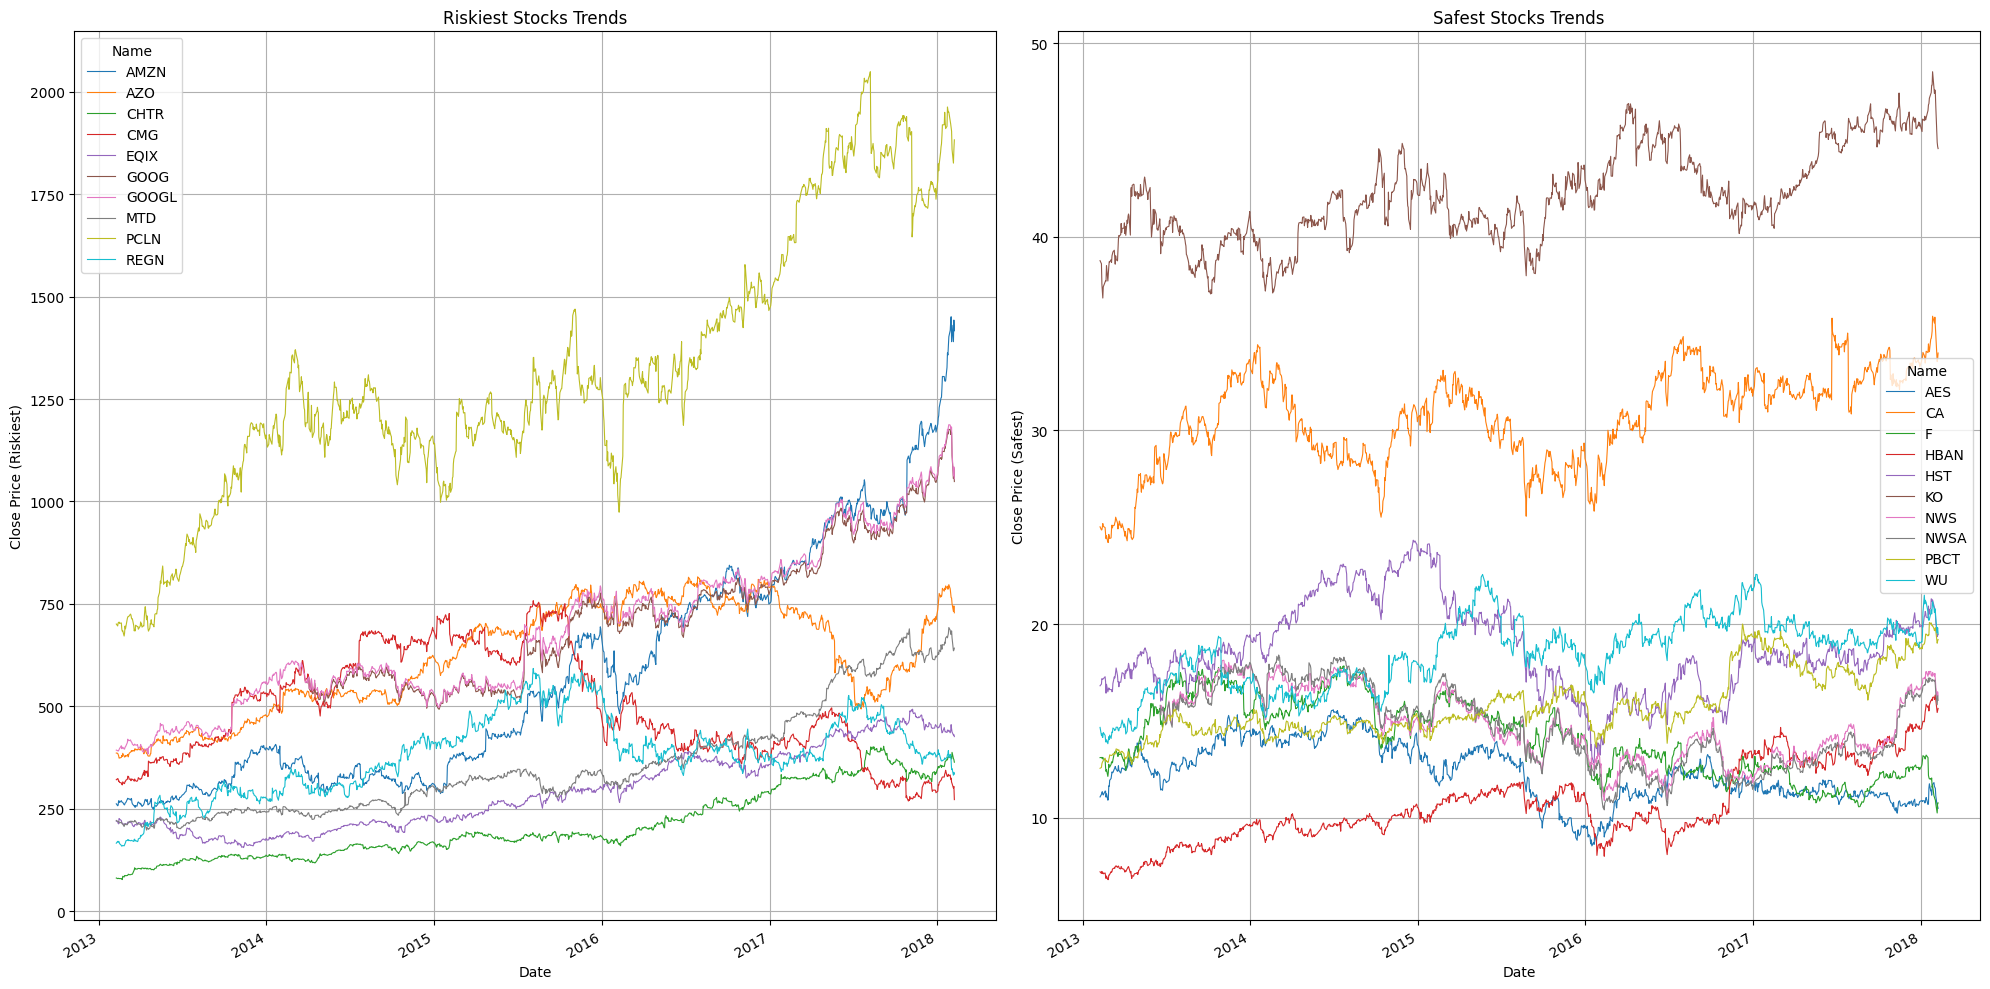

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

# riskiest stocks
df_risk_stock.plot(x='date', ax=ax1, title='Riskiest Stocks Trends', legend=True, linewidth=0.8)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (Riskiest)')
ax1.grid(True)

# safest stocks
df_safe_stock.plot(x='date', ax=ax2, title='Safest Stocks Trends', legend=True, linewidth=0.8)
ax2.set_xlabel('Date')
ax2.set_ylabel('Close Price (Safest)')
ax2.grid(True)

# Show
plt.tight_layout()
plt.show()

# **3. Correlation Analysis**

In [15]:
# Calculate correlation
correlation_risk = df_risk_stock.drop(columns = 'date').corr()
correlation_safe = df_safe_stock.drop(columns = 'date').corr()

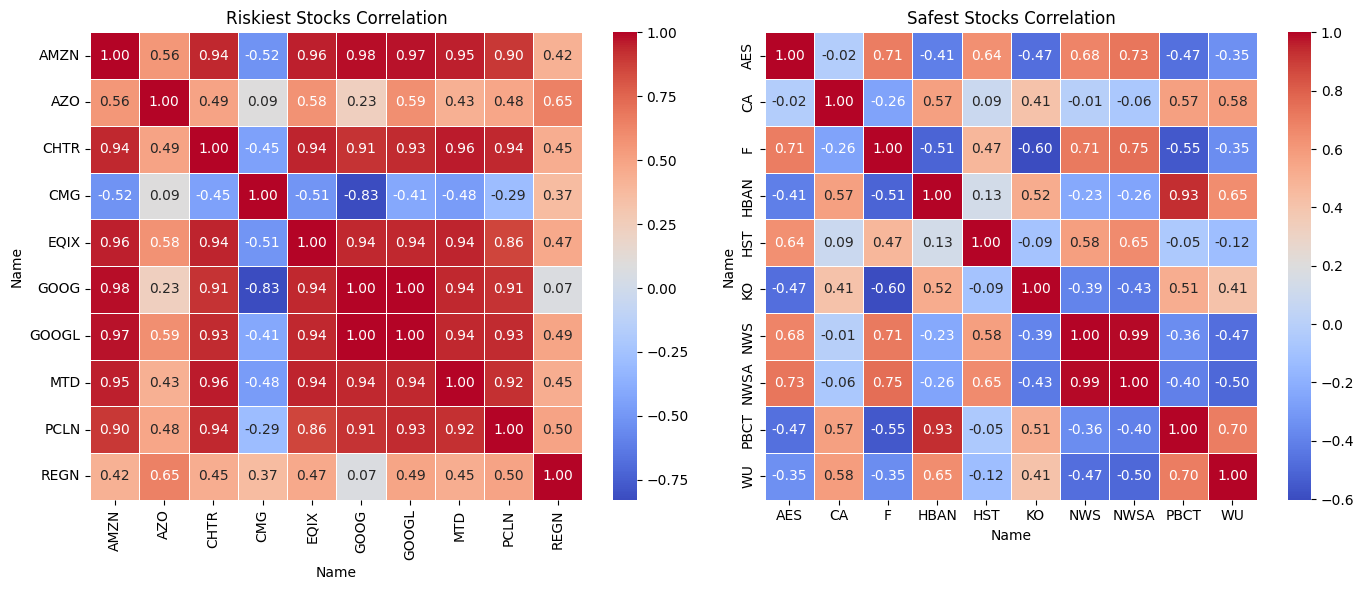

In [16]:
# Heatmap for riskiest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_risk, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Riskiest Stocks Correlation')

# Heatmap for safest
plt.subplot(1, 2, 2)
sns.heatmap(correlation_safe, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Safest Stocks Correlation')

plt.tight_layout()
plt.show()

# **4. Comparative Analysis**

In [37]:
df_risk_return = df_stock[df_stock['Name'].isin(risk_stock_name)]
df_safe_return = df_stock[df_stock['Name'].isin(safe_stock_name)]

In [42]:
df_risk_return

,date,open,high,low,close,volume,Name,daily_return
46387,2013-02-08,261.40,265.250,260.555,261.95,3879078,AMZN,NaN
46388,2013-02-11,263.20,263.250,256.600,257.21,3403403,AMZN,-0.018095
46389,2013-02-12,259.19,260.160,257.000,258.70,2938660,AMZN,0.005793
46390,2013-02-13,261.53,269.960,260.300,269.47,5292996,AMZN,0.041631
46391,2013-02-14,267.37,270.650,265.400,269.24,3462780,AMZN,-0.000854
...,...,...,...,...,...,...,...,...
479262,2018-02-01,366.69,370.990,345.010,345.79,2403117,REGN,-0.056893
479263,2018-02-02,345.17,353.970,340.650,347.86,1546555,REGN,0.005986
479264,2018-02-05,346.33,350.800,331.670,331.98,1296986,REGN,-0.045651
479265,2018-02-06,328.44,339.100,319.500,338.80,2005639,REGN,0.020543


In [44]:
# Calculate daily return
df_risk_return['daily_return'] = (df_risk_return.groupby('Name')['close'].pct_change()) * 100
df_safe_return['daily_return'] = (df_safe_return.groupby('Name')['close'].pct_change()) * 100

<ipython-input-44-c51eb6aadd37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risk_return['daily_return'] = (df_risk_return.groupby('Name')['close'].pct_change()) * 100
<ipython-input-44-c51eb6aadd37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_return['daily_return'] = (df_safe_return.groupby('Name')['close'].pct_change()) * 100


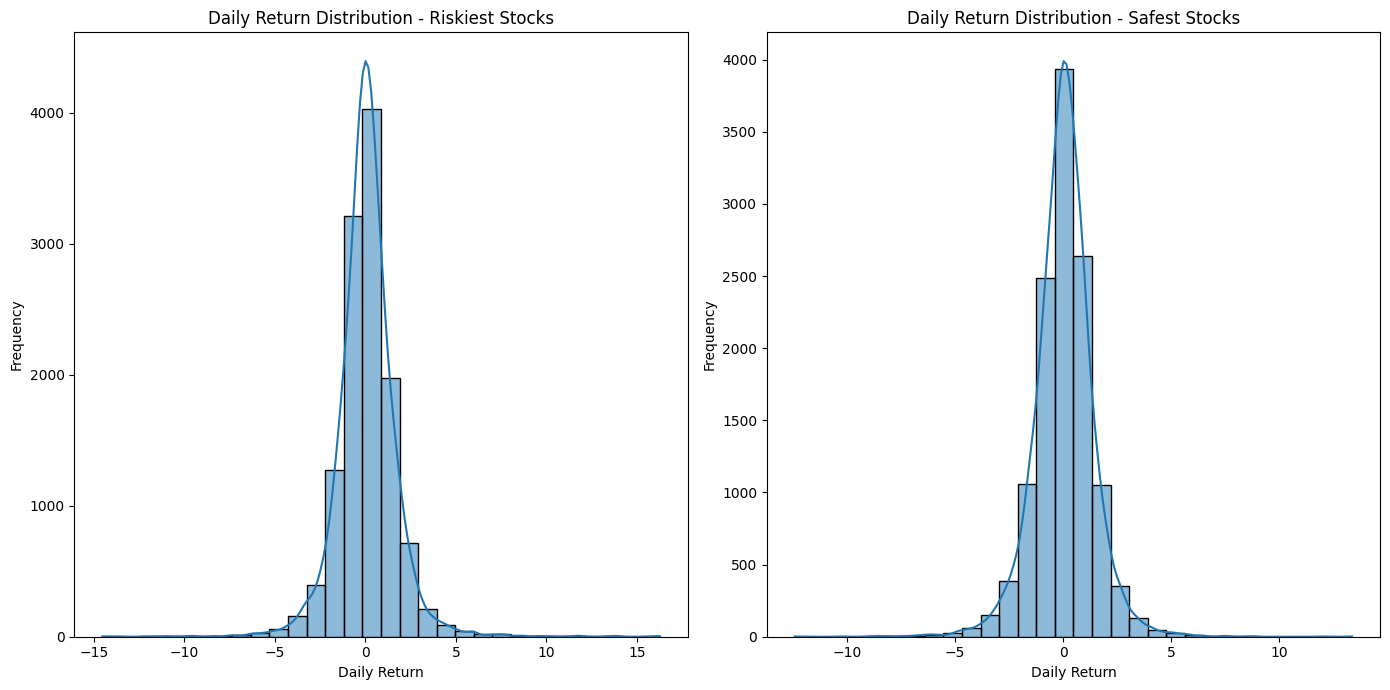

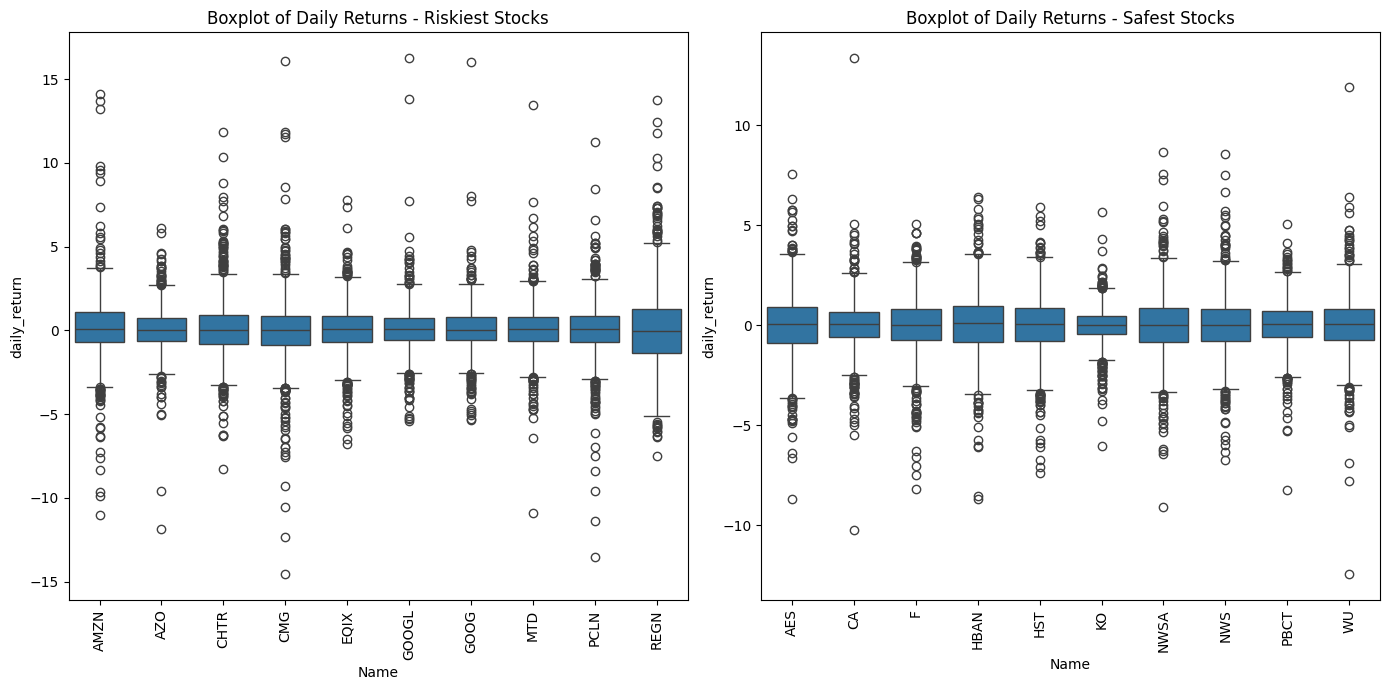

In [45]:
# Histogram for daily return of risk stock
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(df_risk_return['daily_return'].dropna(), kde=True, bins=30)
plt.title('Daily Return Distribution - Riskiest Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Histogram for daily return of safe stock
plt.subplot(1, 2, 2)
sns.histplot(df_safe_return['daily_return'].dropna(), kde=True, bins=30)
plt.title('Daily Return Distribution - Safest Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plot for daily return of riskiest and safest stock
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Name', y='daily_return', data=df_risk_return)
plt.title('Boxplot of Daily Returns - Riskiest Stocks')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='Name', y='daily_return', data=df_safe_return)
plt.title('Boxplot of Daily Returns - Safest Stocks')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Daily Risk vs. Return Analysis**

In [43]:
df_stock['daily_return'] = (df_stock.groupby('Name')['close'].pct_change()) * 100

In [46]:
risk_stock_performance = df_risk_return.groupby('Name')['daily_return'].describe().reset_index()
safe_stock_performance = df_safe_return.groupby('Name')['daily_return'].describe().reset_index()

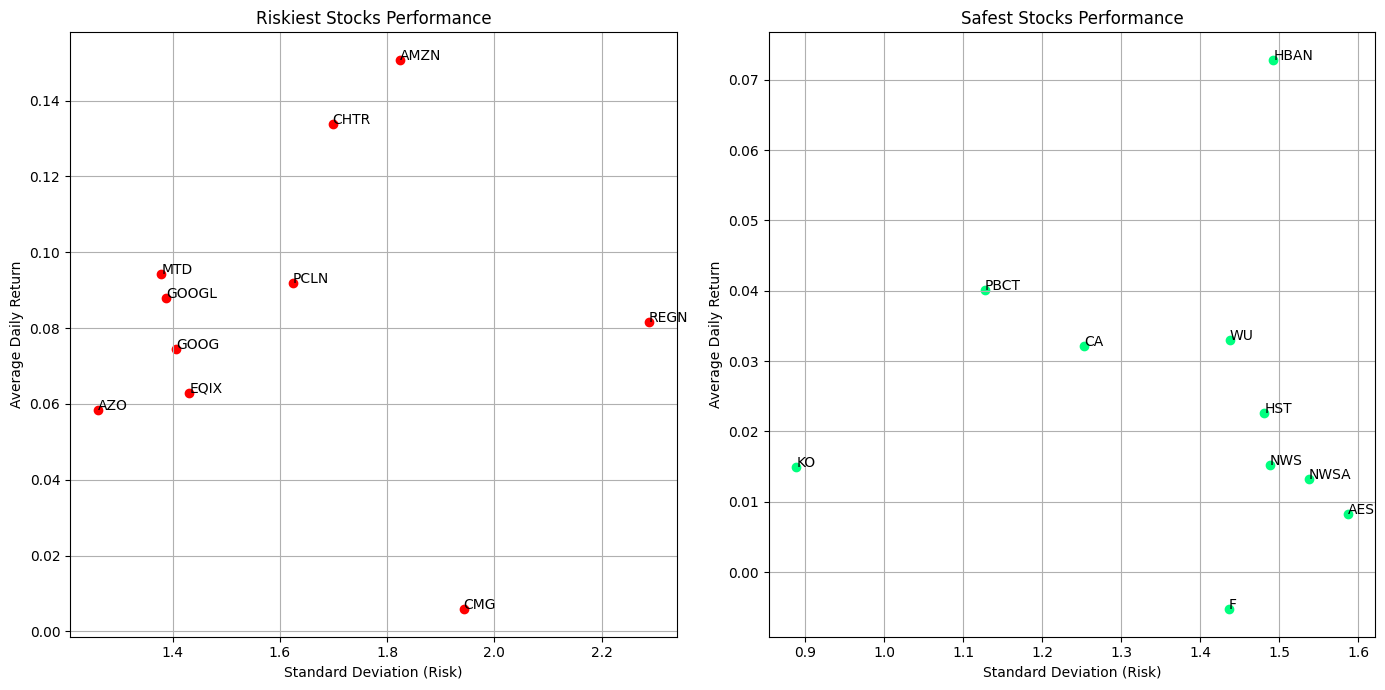

In [47]:
# Visualize Chart
plt.figure(figsize=(14, 7))

# Scatter plot for riskiest
plt.subplot(1, 2, 1)
plt.scatter(risk_stock_performance['std'], risk_stock_performance['mean'], color = 'red')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Average Daily Return')
plt.title('Riskiest Stocks Performance')
plt.grid(True)
for i, row in risk_stock_performance.iterrows():
    plt.text(row['std'], row['mean'], row['Name'])

# Scatter plot for safest
plt.subplot(1, 2, 2)
plt.scatter(safe_stock_performance['std'], safe_stock_performance['mean'], color = 'springgreen')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Average Daily Return')
plt.title('Safest Stocks Performance')
plt.grid(True)
for i, row in safe_stock_performance.iterrows():
    plt.text(row['std'], row['mean'], row['Name'])

plt.tight_layout()
plt.show()

**Sharpe Ratio**

In [48]:
stock_return_overview = df_stock.groupby('Name')['daily_return'].describe().reset_index()

In [56]:
risk_free_rate = (0.04 / 252) * 100
stock_return_overview['Sharpe_ratio'] = ((stock_return_overview['mean'] - risk_free_rate) / stock_return_overview['std']) * 100

In [70]:
top_10_high_sharpe = stock_return_overview.sort_values(by = 'Sharpe_ratio', ascending = True).tail(10)
top_10_low_sharpe = stock_return_overview.sort_values(by = 'Sharpe_ratio', ascending = True).head(10)

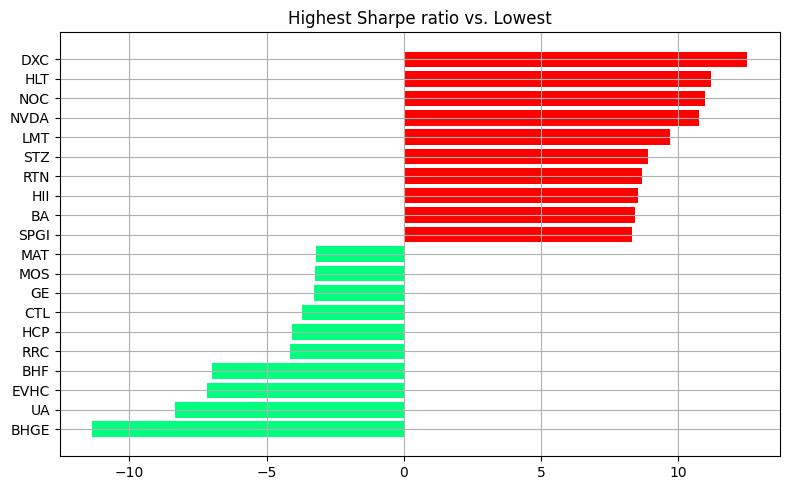

In [77]:
plt.figure(figsize = (8, 5))

# Riskiest Stocks Chart
plt.barh(top_10_low_sharpe['Name'], top_10_low_sharpe['Sharpe_ratio'], color = 'springgreen')
plt.barh(top_10_high_sharpe['Name'], top_10_high_sharpe['Sharpe_ratio'], color = 'red')
plt.title('Highest Sharpe ratio vs. Lowest')
# Show
plt.tight_layout()
plt.grid(True)
plt.show()

**Volatility vs. Sharpe Ratio**

In [53]:
# Riskiest Stocks
risk_stock_performance['Sharpe_ratio'] = ((risk_stock_performance['mean'] - risk_free_rate) / risk_stock_performance['std']) * 100
# Safest Stocks
safe_stock_performance['Sharpe_ratio'] = ((safe_stock_performance['mean'] - risk_free_rate) / safe_stock_performance['std']) * 100

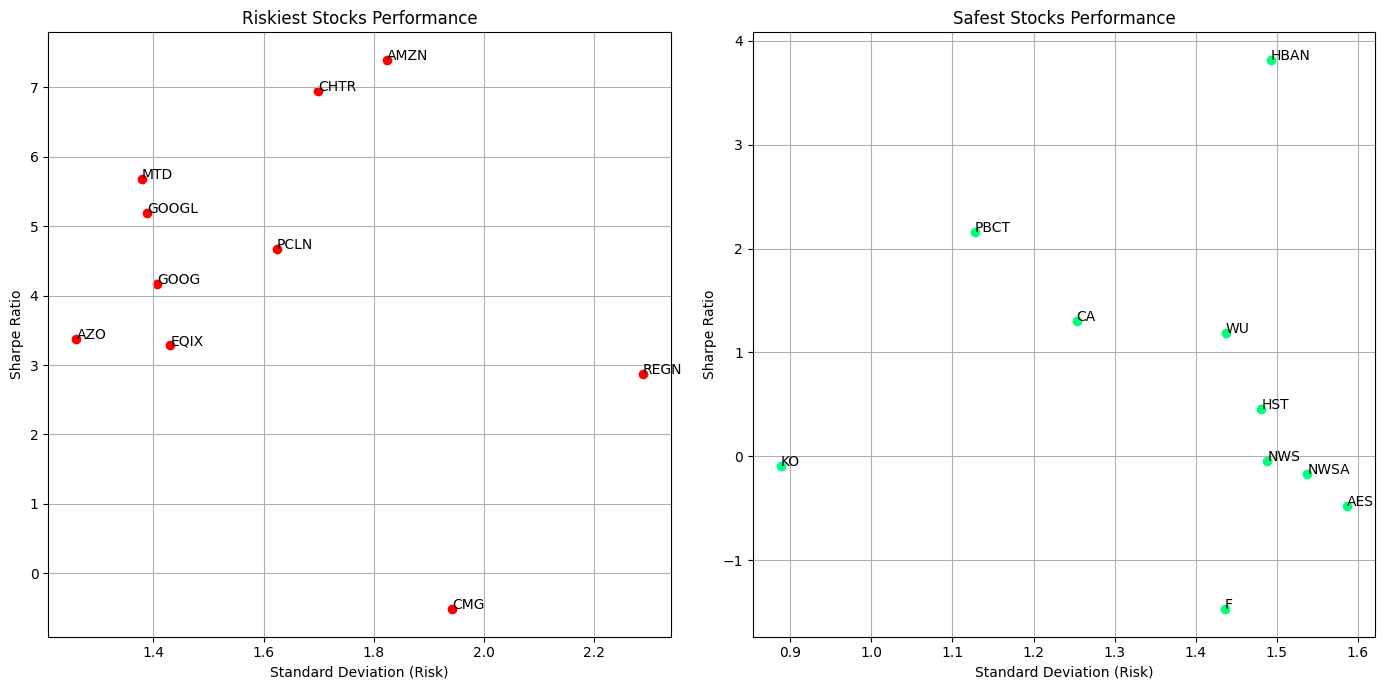

In [55]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Scatter plot cho nhóm riskiest
plt.subplot(1, 2, 1)
plt.scatter(risk_stock_performance['std'], risk_stock_performance['Sharpe_ratio'], color = 'red')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Sharpe Ratio')
plt.title('Riskiest Stocks Performance')
plt.grid(True)
for i, row in risk_stock_performance.iterrows():
    plt.text(row['std'], row['Sharpe_ratio'], row['Name'])

# Scatter plot cho nhóm safest
plt.subplot(1, 2, 2)
plt.scatter(safe_stock_performance['std'], safe_stock_performance['Sharpe_ratio'], color = 'springgreen')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Sharpe Ratio')
plt.title('Safest Stocks Performance')
plt.grid(True)
for i, row in safe_stock_performance.iterrows():
    plt.text(row['std'], row['Sharpe_ratio'], row['Name'])

plt.tight_layout()
plt.show()